# Postwork 1.

**Estimados de Locación y Variabilidad**

La actividad consiste en lo siguiente:

- Identifica las columnas de tu dataset que tengan datos numéricos.
- Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
- Obtén los siguientes estimados de tus columnas numéricas:
  - Promedio
  - Mediana
  - Media Truncada
  - Desviación estándar
  - Rango
  - Percentiles 25 y 75 (por lo menos)
  - Rango intercuartil

Comenta qué has aprendido sobre tus datos al estudiar estas medidas.

Para este módulo, utilizaremos nuestro dataset limpio, el cual proviene del análisis exploratorio de datos.

In [1]:
#Importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MGuadalupeVazquez/Proyecto-final-BEDU/main/water_clean.csv', index_col=0)
df.head()

ph    hardness       solids  chloramines  conductivity  \
0  3.716080  129.422921  18630.05786     6.635246    592.885359   
1  8.099124  224.236259  19909.54173     9.275884    418.606213   
2  8.316766  214.373394  22018.41744     8.059332    363.266516   
3  9.092223  181.101509  17978.98634     6.546600    398.410813   
4  5.584087  188.313324  28748.68774     7.544869    280.467916   

   organic_carbon  trihalomethanes  turbidity  potability  
0       15.180013        56.329076   4.500656           0  
1       16.868637        66.420093   3.055934           0  
2       18.436525       100.341674   4.628771           0  
3       11.558279        31.997993   4.075075           0  
4        8.399735        54.917862   2.559708           0

Tenemos 6 variables numéricas, las cuales hasta el momento siguen siendo relevantes. Y como el objetivo es seleccionar e identificar las más importantes, para todas se calcularán los estimados de locación y variabilidad. Para esto definiremos una función:

In [3]:
from scipy import stats #mediana

def estimados(data,col):
  print(f"Promedio = {data[col].mean():.2f}")
  print(f"Media truncada al 10% = {stats.trim_mean(data[col], 0.1):.2f}")
  print(f"Desviación estándar = {data[col].std():.2f}")
  print(f"Mediana = {data[col].median():.2f}")
  print(f"Rango = {data[col].max()-df[col].min():.2f}")
  print(f"Mínimo = {data[col].quantile(0):.2f}")
  print(f"Percentil 25 = {data[col].quantile(0.25):.2f}")
  print(f"Percentil 75 = {data[col].quantile(0.75):.2f}")
  print(f"Máximo= {data[col].quantile(1):.2f}")
  print(f"Rango intercuantil = {data[col].quantile(0.75) - data[col].quantile(0.25):.2f}")

In [4]:
for col in df.columns[0:8]:
  print(col)
  estimados(df,col)
  print('*'*50)

ph
Promedio = 7.08
Media truncada al 10% = 7.07
Desviación estándar = 1.58
Mediana = 7.04
Rango = 14.00
Mínimo = 0.00
Percentil 25 = 6.09
Percentil 75 = 8.05
Máximo= 14.00
Rango intercuantil = 1.96
**************************************************
hardness
Promedio = 196.33
Media truncada al 10% = 196.43
Desviación estándar = 32.89
Mediana = 197.19
Rango = 249.63
Mínimo = 73.49
Percentil 25 = 176.81
Percentil 75 = 216.67
Máximo= 323.12
Rango intercuantil = 39.87
**************************************************
solids
Promedio = 21923.81
Media truncada al 10% = 21399.74
Desviación estándar = 8692.44
Mediana = 20852.76
Rango = 56546.92
Mínimo = 320.94
Percentil 25 = 15671.12
Percentil 75 = 27215.90
Máximo= 56867.86
Rango intercuantil = 11544.78
**************************************************
chloramines
Promedio = 7.13
Media truncada al 10% = 7.12
Desviación estándar = 1.59
Mediana = 7.12
Rango = 12.60
Mínimo = 0.53
Percentil 25 = 6.14
Percentil 75 = 8.11
Máximo= 13.13
Rango interc

In [5]:
print(f"Porcentaje de muestras de agua potable: {df['potability'].sum()/len(df)*100:.2f}%")

Porcentaje de muestras de agua potable: 39.71%


* Para la columna de `pH` se tiene una media de 7.08, es decir, prácticamente neutro. Además, apesar de que menos de la mitad de nuestro dataset es de agua potable, la media y la media truncada son prácticamente iguales, por lo que podemos empezar a intuir que en esta columna no se tienen valores atípicos. También tenemos una desviación estándar no muy alta, por lo que podemos pensar que gran parte de las muestras no son muy ácidas o muy básicas. La mediana tiene un valor bastante cercano a la media. En el rango, vemos que sí hay muestras que son completamente ácidas o completamente básicas. Y por último, el rango intercuantil no es muy amplio, y por el percentil 75 deducimos que son pocas las muestras cerca de un pH=14.

* En la columna `hardness`, vemos que el promedio, la media truncada al 10% y la mediana son cercanas. Lo mismo ocurre con las medidas de dispersión como la desviación estándar y el rango intercuantil, por lo que probablemente no encontremos valores atípicos. Además, por los percentiles es posible que los valores se encuentren distribuidos a lo largo del rango.

* En la columna `solids`, el promedio, la media truncada y la mediana no son tan cercanas, esto posiblemente se deba a que los datos toman valores más grandes. La desviación estándar y el rango intercuantil son diferentes; y por el valor de los percentiles, la mayoría de los datos se encuentran por debajo de la mitad del rango aproximadamente.

* Para la columna `chloramines`, nuevamente el promedio, la media truncada y la mediana son muy similares, también la desviación estándar y el rango intercuantil toman valores cercanos; y  por los percentiles, podemos decir que los datos se distribuyen de forma uniforme a lo largo del rango.

* En la columna `conductivity` volvemos a tener valores cercanos en el promedio, la media truncada y la mediana. La desviación estándar y el rango intercuantil son ligeramente distintos, la mayor parte de los datos se acumulan bajo la mitad del rango.

* En la columna `organic_carbon`, los valores del promedio, la media truncada y la mediana son prácticamente iguales. El rango intercuantil es mayor que la desviación estándar y la mayor parte de los datos se encuentran en la primera mitad del rango.

* Para la columna `trihalomethanes`, el promedio, la media truncada y la mediana son muy similares, la desviación estándar es bastante menor que el rango intercuantil y la mayor parte de los datos se acumulan en la segunda mitad del rango.

* Para `turbidity`, el promedio es igual a la media truncada y a la mediana. La desviación estándar es muy pequeña al igual que el rango intercuantil. La mayor parte de los datos se acumulan en la segunda mitad del rango.

En conclusión, ninguna de las columnas pareciera tener datos atípicos, aunque por lo visto, no tenemos distribuciones simétricas.

# Postwork 2

**Introducción a la visualización de datos: Distribuciones**

Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

- Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
- Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
- Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
- Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

## Boxplots

Como todas las columnas de nuestro dataset son variables numéricas, a excepción de `potability`, realizaremos gráficas de cajas para todas. Definiremos algunas funciones auxiliares:

In [6]:
def medidas(data):
  print("Media: ", round(data.mean(),4))
  print("Mediana: ", round(data.median(),4))
  print("Desviación estándar: ", round(data.std(),4))

def filtrar_va(data, score):
  iqr = data.quantile(0.75) - data.quantile(0.25)
  filtro_inferior = data > data.quantile(0.25) - (iqr * score)
  filtro_superior = data < data.quantile(0.75) + (iqr * score)
  df_filtrado = data[filtro_inferior & filtro_superior]
  return df_filtrado

def comparacion(name_col, score):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
  fig.suptitle(name_col, fontsize=18);
  
  ax = sns.boxplot(x=df[name_col], ax = ax1);
  ax.set(xlabel='',title='Dataset original')
  print('\033[1m' + 'MEDIDAS DEL DATASET ORIGINAL' + '\033[0m')
  medidas(df[name_col])
  print('\n')

  col = filtrar_va(df[name_col], score)
  bx = sns.boxplot(x=col, ax = ax2);
  bx.set(xlabel='',title='Dataset filtrado')
  print('\033[1m' + f'MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = {score}' + '\033[0m')
  medidas(col)
  print('\n')

In [7]:
sns.set_style("whitegrid")

MEDIDAS DEL DATASET ORIGINAL
Media:  7.0801
Mediana:  7.0381
Desviación estándar:  1.5845


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  7.0693
Mediana:  7.0335
Desviación estándar:  1.4493




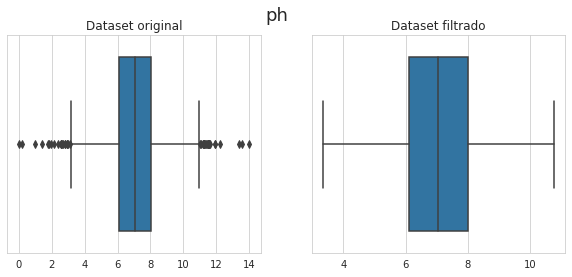

In [8]:
comparacion('ph', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  196.3345
Mediana:  197.1918
Desviación estándar:  32.8922


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  196.2913
Mediana:  197.1672
Desviación estándar:  29.1051




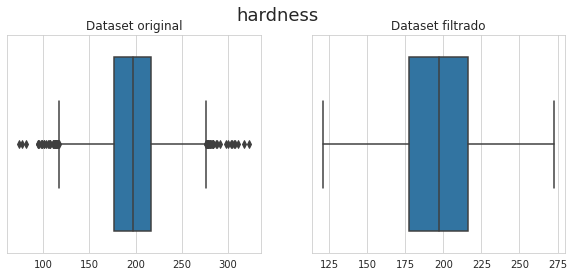

In [9]:
comparacion('hardness', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  21923.8112
Mediana:  20852.7645
Desviación estándar:  8692.4413


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  21449.1426
Mediana:  20526.0497
Desviación estándar:  8015.1988




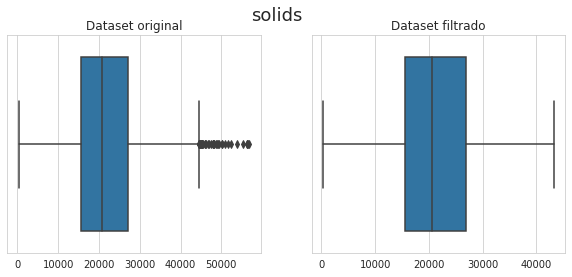

In [10]:
comparacion('solids', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  7.127
Mediana:  7.1213
Desviación estándar:  1.5863


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  7.1342
Mediana:  7.124
Desviación estándar:  1.4204




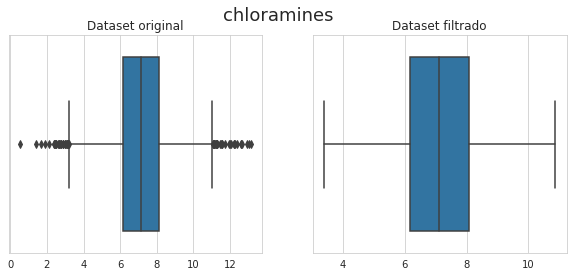

In [11]:
comparacion('chloramines', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  427.5884
Mediana:  424.0035
Desviación estándar:  81.1037


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  426.4668
Mediana:  423.4208
Desviación estándar:  79.0662




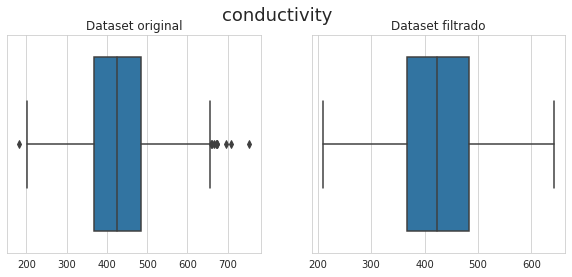

In [12]:
comparacion('conductivity', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  14.3027
Mediana:  14.2527
Desviación estándar:  3.3148


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  14.3027
Mediana:  14.2527
Desviación estándar:  3.1768




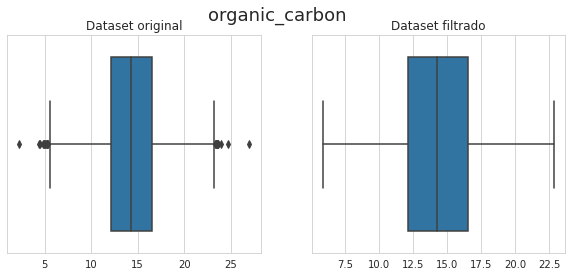

In [13]:
comparacion('organic_carbon', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  66.4916
Mediana:  66.6089
Desviación estándar:  16.1624


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.4
Media:  66.5623
Mediana:  66.617
Desviación estándar:  15.1888




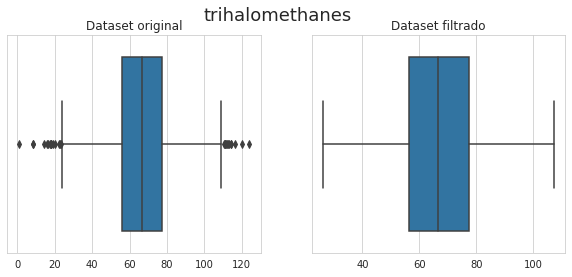

In [14]:
comparacion('trihalomethanes', 1.4)

MEDIDAS DEL DATASET ORIGINAL
Media:  3.9697
Mediana:  3.9586
Desviación estándar:  0.7806


MEDIDAS DEL DATASET FILTRADO CON UN SCORE INTERCUANTÍLICO = 1.5
Media:  3.9721
Mediana:  3.9596
Desviación estándar:  0.7623




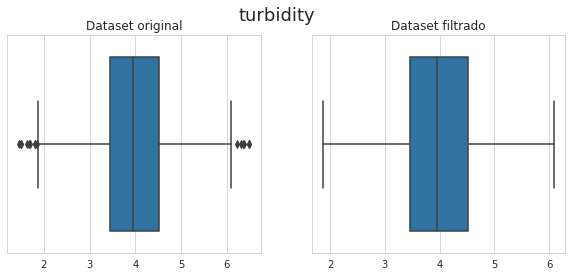

In [15]:
comparacion('turbidity', 1.5)

En todas las columnas se observan datos por fuera de los ambos lados de los bigotes, excepto por la columna `solids` que solo tiene puntos a lado derecho. En todos los casos los datos se filtraron con un score intercuantílico de 1.4, menos la columna de `turbidity` que requirió un score de 1.5.

En ningún caso observamos datos en extremo atípicos, por lo que creemos poder seguir trabajando con los datos originales.

## Histogramas

Ahora generaremos las tablas de frecuencia e histograma para cada una de las 8 variables numéricas.

In [16]:
def tabla_frec_hist(name_col):
  rango = df[name_col].max() - df[name_col].min()
  print('rango = ', round(rango,4))
  num_seg = int(input('Número de segmentos?: '))
  print('\n')
  segmentos = pd.cut(df[name_col], num_seg)
  print(df[name_col].groupby(segmentos).count())
  fig = plt.figure(figsize=(7,5))
  ax=sns.histplot(df[name_col], kde=False);
  ax.set_xlabel(name_col, fontsize=16)
  ax.set_ylabel('Frecuencia', fontsize=16)
  print(f"\nCurtosis: {round(kurtosis(df[name_col]),4)}")
  print(f"Asimetría: {round(skew(df[name_col]),4)}")

rango =  14.0
Número de segmentos?: 5


ph
(-0.014, 2.8]      15
(2.8, 5.6]        413
(5.6, 8.4]       1731
(8.4, 11.2]       470
(11.2, 14.0]       20
Name: ph, dtype: int64

Curtosis: 0.6887
Asimetría: 0.0254


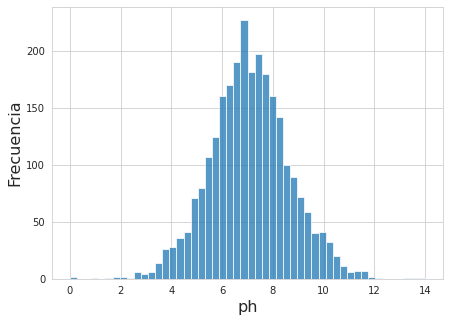

In [17]:
tabla_frec_hist('ph') #usaremos 5 segmentos

La asimetría es prácticamente 0, es decir, la distribución es simétrica. Sin embargo, la curtosis es positiva, por lo que la curva es leptocúrtica, es decir, las colas son cortas y los datos presentan poca dispersión.

rango =  249.6318
Número de segmentos?: 15


hardness
(73.243, 90.134]        3
(90.134, 106.776]      11
(106.776, 123.419]     36
(123.419, 140.061]     74
(140.061, 156.703]    171
(156.703, 173.345]    287
(173.345, 189.987]    500
(189.987, 206.629]    590
(206.629, 223.271]    471
(223.271, 239.913]    287
(239.913, 256.556]    121
(256.556, 273.198]     56
(273.198, 289.84]      32
(289.84, 306.482]       5
(306.482, 323.124]      5
Name: hardness, dtype: int64

Curtosis: 0.5625
Asimetría: -0.0103


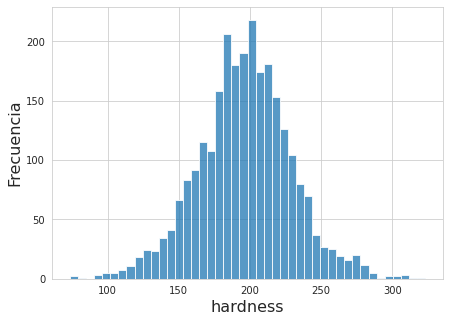

In [18]:
tabla_frec_hist('hardness') #usaremos 15 segmentos

Al igual que la columna `ph`, la asimetría es casi igual a 0, por lo que la distribución es simétrica. Además, una curtosis positiva nos indica una distribución escarpada o leptocúrtica, o bien, colas cortas y datos con poca dispersión.

rango =  56546.9166
Número de segmentos?: 25


solids
(264.396, 2582.819]         6
(2582.819, 4844.696]       14
(4844.696, 7106.573]       34
(7106.573, 9368.449]       71
(9368.449, 11630.326]     128
(11630.326, 13892.203]    217
(13892.203, 16154.079]    261
(16154.079, 18415.956]    288
(18415.956, 20677.833]    298
(20677.833, 22939.709]    240
(22939.709, 25201.586]    240
(25201.586, 27463.463]    210
(27463.463, 29725.339]    171
(29725.339, 31987.216]    123
(31987.216, 34249.093]    107
(34249.093, 36510.969]     82
(36510.969, 38772.846]     37
(38772.846, 41034.723]     54
(41034.723, 43296.599]     20
(43296.599, 45558.476]     22
(45558.476, 47820.353]      6
(47820.353, 50082.229]      9
(50082.229, 52344.106]      5
(52344.106, 54605.983]      1
(54605.983, 56867.859]      5
Name: solids, dtype: int64

Curtosis: 0.4363
Asimetría: 0.6154


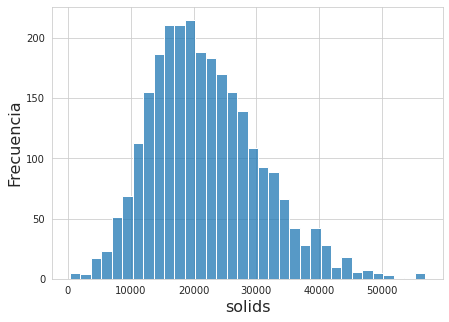

In [19]:
tabla_frec_hist('solids') #25 segmentos

En este caso, tanto la asimetría como la curtosis son positivas. La asimetría positiva indica una cola derecha larga, y la curtosis positiva indica una distribución leptocúrtica, es decir, poca dispersión de los datos.

rango =  12.5966
Número de segmentos?: 6


chloramines
(0.518, 2.63]         12
(2.63, 4.729]        144
(4.729, 6.829]       971
(6.829, 8.928]      1196
(8.928, 11.028]      297
(11.028, 13.127]      29
Name: chloramines, dtype: int64

Curtosis: 0.6457
Asimetría: 0.0238


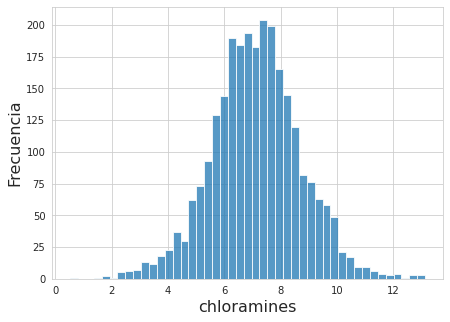

In [20]:
tabla_frec_hist('chloramines') #6 segmentos

Nuevamente la asimetría (que es muy cercana a 0) y la curtosis son positivas, entonces la distribución es simétrica y leptocúrtica.

rango =  571.8589
Número de segmentos?: 8


conductivity
(180.912, 252.966]      9
(252.966, 324.448]    242
(324.448, 395.931]    733
(395.931, 467.413]    828
(467.413, 538.896]    598
(538.896, 610.378]    203
(610.378, 681.86]      33
(681.86, 753.343]       3
Name: conductivity, dtype: int64

Curtosis: -0.2397
Asimetría: 0.2601


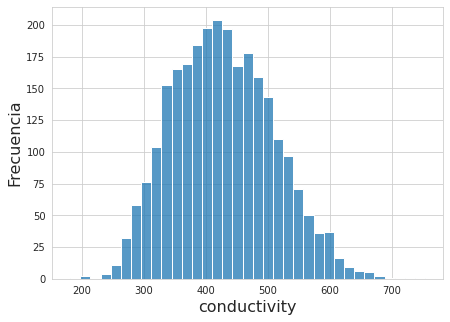

In [21]:
tabla_frec_hist('conductivity') #8 segmentos

Para esta columna, la asimetría es positiva pero pequeña, por lo tanto, la cola derecha es más larga que la izquierda. Y como la curtosis es negativa, tenemos una distribución platicúrtica, es decir, hay mayor dispersión en los datos.

rango =  24.8067
Número de segmentos?: 6


organic_carbon
(2.175, 6.334]        27
(6.334, 10.469]      283
(10.469, 14.603]    1121
(14.603, 18.738]     994
(18.738, 22.872]     209
(22.872, 27.007]      15
Name: organic_carbon, dtype: int64

Curtosis: 0.0165
Asimetría: -0.0013


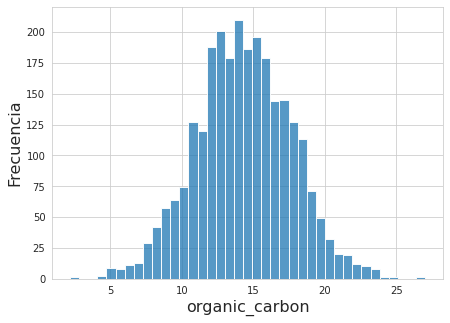

In [22]:
tabla_frec_hist('organic_carbon') #6 segmentos

Tanto la curtosis como la asimetría son prácticamente iguales a 0, entonces tenemos una distribución simétrica y mesocúrtica. Similar a la distribución normal.

rango =  123.262
Número de segmentos?: 8


trihalomethanes
(0.615, 16.146]        5
(16.146, 31.554]      38
(31.554, 46.961]     261
(46.961, 62.369]     727
(62.369, 77.777]     975
(77.777, 93.184]     528
(93.184, 108.592]    102
(108.592, 124.0]      13
Name: trihalomethanes, dtype: int64

Curtosis: 0.2459
Asimetría: -0.0885


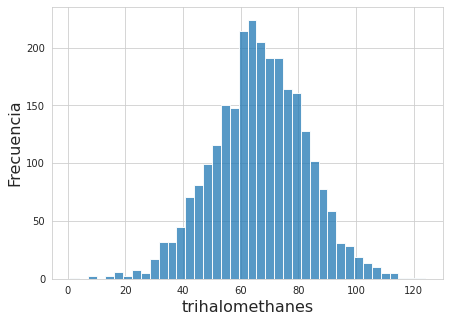

In [23]:
tabla_frec_hist('trihalomethanes') #8 segmentos

Como la asimetría es casi 0, la distribución es simétrica. Una curtosis positiva indica una distribución leptocúrtica, es decir, datos con poca dispersión.

rango =  5.0447
Número de segmentos?: 7


turbidity
(1.445, 2.171]     29
(2.171, 2.891]    196
(2.891, 3.612]    605
(3.612, 4.333]    956
(4.333, 5.053]    637
(5.053, 5.774]    206
(5.774, 6.495]     20
Name: turbidity, dtype: int64

Curtosis: -0.0866
Asimetría: -0.0434


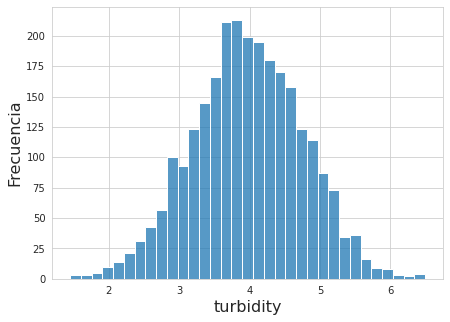

In [24]:
tabla_frec_hist('turbidity') # 7 segmentos

En esta columna, tanto la asimetría como la curtosis son prácticamente iguales a 8, por lo que la distribución es simétrica y mesocúrtica. Podría decirse que esta variable tiene una distribución normal.

## Gráficas de densidad por categoría.

Como todas las filas pueden separarse por categoría, según la columna `potability` que toma los valores 0 para agua no potable y 1 para agua potable; se elaborarán todas las gráficas.

In [25]:
potable = df[df['potability']==1]
no_potable = df[df['potability']==0]

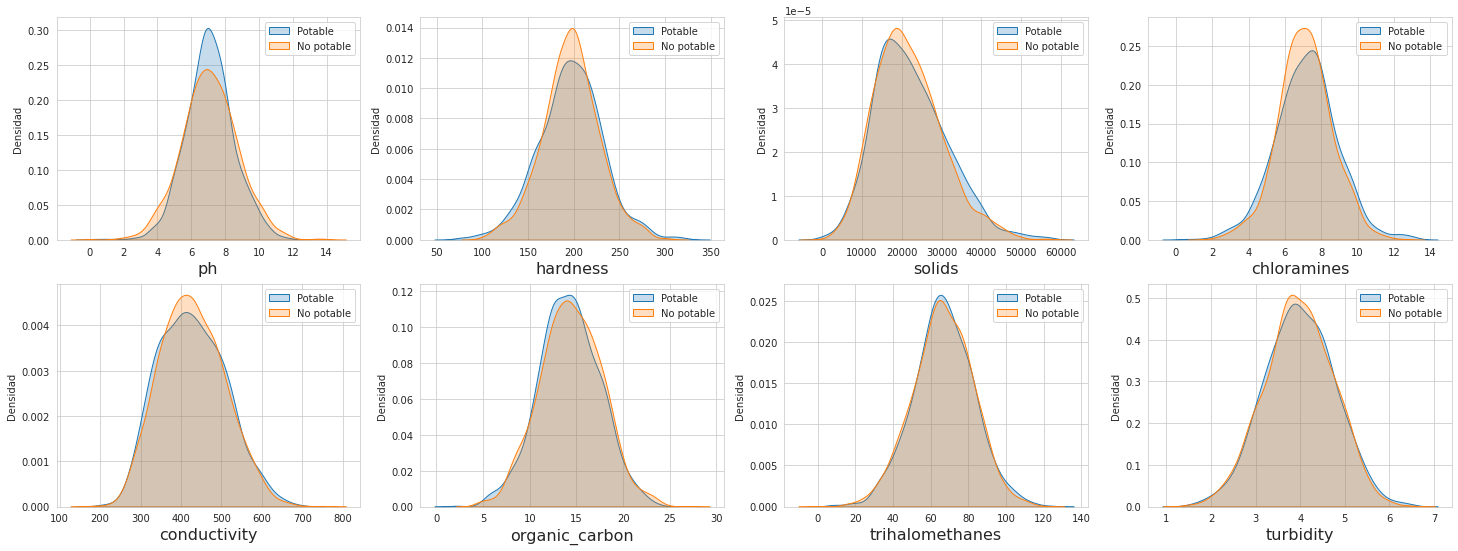

In [26]:
cols = df.columns
fig = plt.figure(figsize=(25,9))
for i in range(1,len(cols)):
  plt.subplot(2, 4, i)
  ax = sns.kdeplot(potable[cols[i-1]], shade = True, label = 'Potable')
  ax = sns.kdeplot(no_potable[cols[i-1]], shade = True, label = 'No potable')
  ax.set_ylabel('Densidad')
  ax.set_xlabel(cols[i-1], fontsize=16)
  ax.legend(loc=0)

Como podemos ver, no existe mucha diferencia entre las distribuciones según la categoria, para todas las variables.

# Postwork 3

**Exploración de Variables Categóricas y Análisis Multivariable**

Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

- Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
- Identifica todas las variables categóricas en tu dataset.
- Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
- Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
- Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
- Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
- De preferencia ve registrando por escrito todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

Sólo tenemos una columna categórica en nuestro dataset.

In [27]:
counts = df['potability'].value_counts()
counts

0    1597
1    1052
Name: potability, dtype: int64

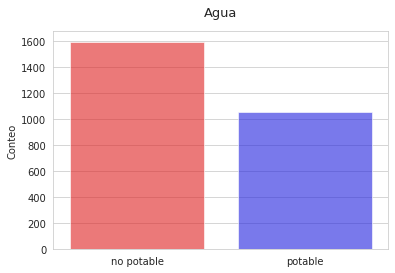

In [28]:
ax = sns.barplot(x=['no potable', 'potable'], y=counts, palette=['red', 'blue'], alpha=0.6)
ax.set_title('Agua', fontsize=13, pad=15)
ax.set(ylabel='Conteo');

Como `potability` es la única variable categórica, crearemos una variable "artificial" para identificar el pH de los cuerpos de agua. En donde 1 será pH ácido; y 0, pH básico.

In [29]:
df['acid'] = 0
df.head()

ph    hardness       solids  chloramines  conductivity  \
0  3.716080  129.422921  18630.05786     6.635246    592.885359   
1  8.099124  224.236259  19909.54173     9.275884    418.606213   
2  8.316766  214.373394  22018.41744     8.059332    363.266516   
3  9.092223  181.101509  17978.98634     6.546600    398.410813   
4  5.584087  188.313324  28748.68774     7.544869    280.467916   

   organic_carbon  trihalomethanes  turbidity  potability  acid  
0       15.180013        56.329076   4.500656           0     0  
1       16.868637        66.420093   3.055934           0     0  
2       18.436525       100.341674   4.628771           0     0  
3       11.558279        31.997993   4.075075           0     0  
4        8.399735        54.917862   2.559708           0     0

In [30]:
df['acid'].loc[df['ph']<7] = 1
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ph    hardness       solids  chloramines  conductivity  \
0  3.716080  129.422921  18630.05786     6.635246    592.885359   
1  8.099124  224.236259  19909.54173     9.275884    418.606213   
2  8.316766  214.373394  22018.41744     8.059332    363.266516   
3  9.092223  181.101509  17978.98634     6.546600    398.410813   
4  5.584087  188.313324  28748.68774     7.544869    280.467916   

   organic_carbon  trihalomethanes  turbidity  potability  acid  
0       15.180013        56.329076   4.500656           0     1  
1       16.868637        66.420093   3.055934           0     0  
2       18.436525       100.341674   4.628771           0     0  
3       11.558279        31.997993   4.075075           0     0  
4        8.399735        54.917862   2.559708           0     1

In [31]:
counts = df['acid'].value_counts()
counts

0    1350
1    1299
Name: acid, dtype: int64

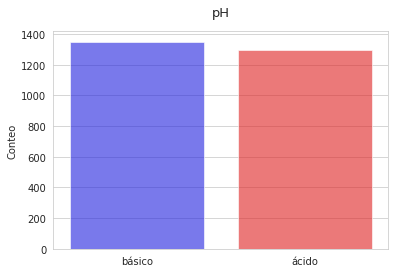

In [32]:
ax = sns.barplot(x=['básico', 'ácido'], y=counts, palette=['blue', 'red'], alpha=0.6)
ax.set_title('pH', fontsize=13, pad=15)
ax.set(ylabel='Conteo');

La distribución de los datos en cuanto a la potabilidad no es equitativa, tenemos aproximadamente un 50% más de muestras no potables que potables. Sin embargo, tenemos casi la misma cantidad de muestras ácidas y básicas.

In [33]:
crosstab = pd.crosstab(df['acid'],df['potability'])
crosstab

potability    0    1
acid                
0           811  539
1           786  513

Tanto en pH ácido como básico, hay más muestras de agua no potable.

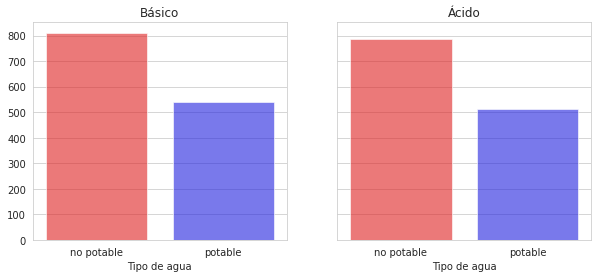

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax=sns.barplot(x=['no potable', 'potable'], y=crosstab.loc[0], ax = ax1, palette=['red', 'blue'], alpha=0.6)
bx=sns.barplot(x=['no potable', 'potable'], y=crosstab.loc[1], ax = ax2, palette=['red', 'blue'], alpha=0.6)

ax.set(xlabel='Tipo de agua', ylabel='', title='Básico')
bx.set(xlabel='Tipo de agua', ylabel='', title='Ácido');

Ya vimos que las densidades de las variables numéricas según la variable categórica `potability`, no son muy diferentes entre sí. Así que probaremos con la variable `acid`.

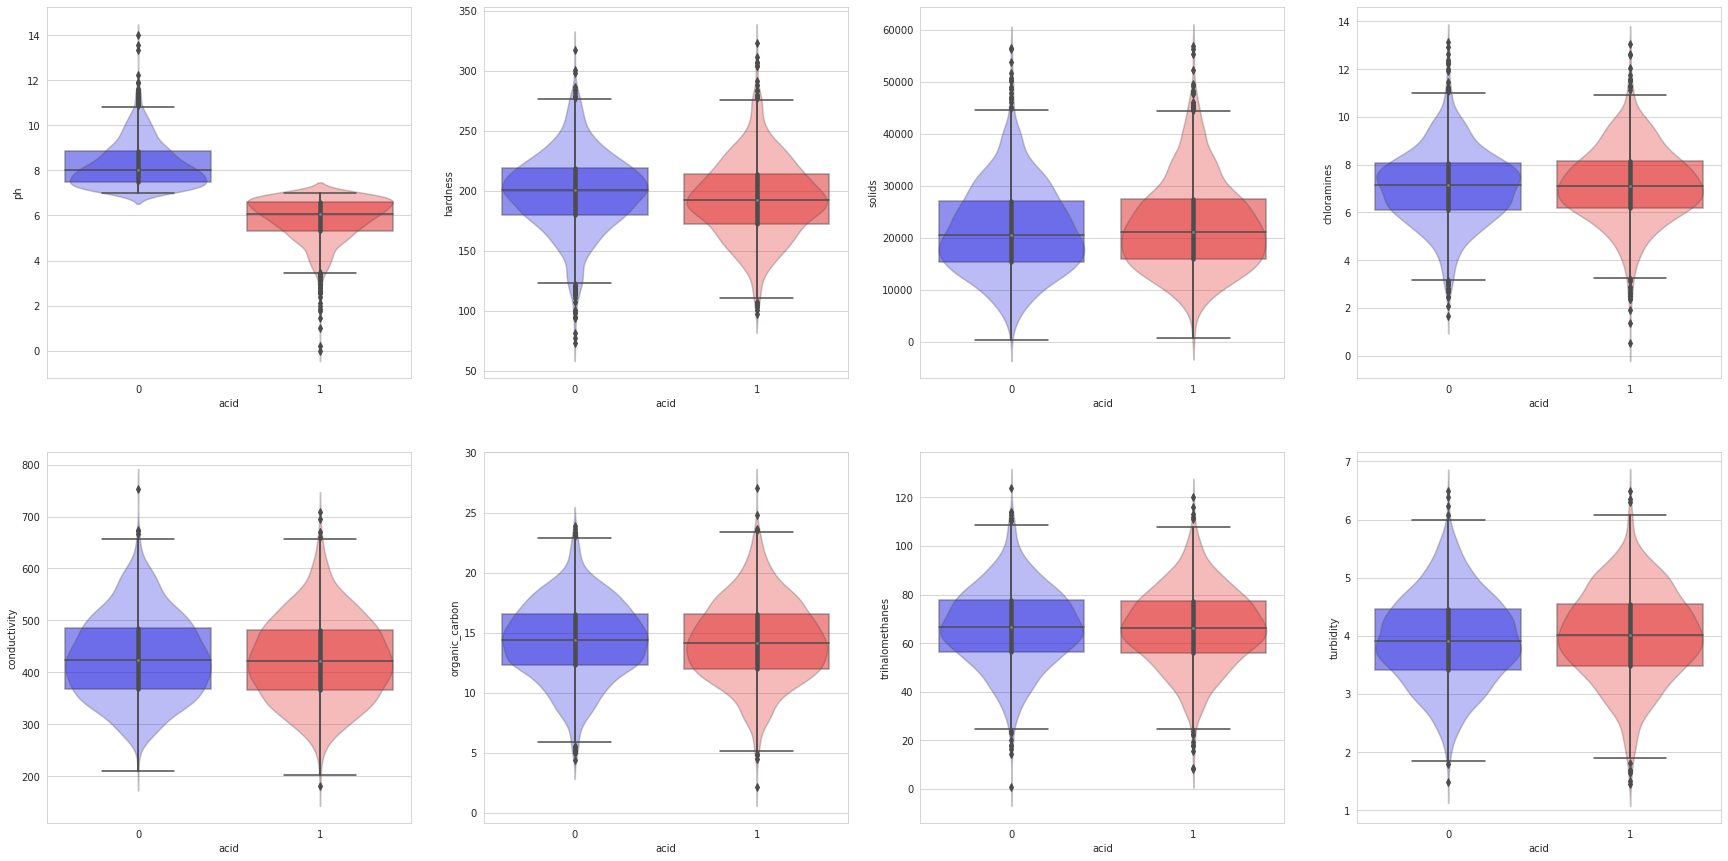

In [35]:
cols = df.columns
fig = plt.figure(figsize=(30,15))
for i in range(1,len(cols)-1):
  plt.subplot(2, 4, i)
  ax = sns.boxplot(data=df, x='acid', y=cols[i-1], palette=['blue', 'red'], boxprops=dict(alpha=.5));
  ax = sns.violinplot(data=df, x='acid', y=cols[i-1], palette=['blue', 'red']);
  plt.setp(ax.collections, alpha=.3); 

No existe mucha diferencia entre las distribuciones graficadas para cada columna, con respecto a las categorías de ácido y base. Por otro lado, se esperaba que la gráfica correspondiente a la columna `ph` tuviera ese comportamiento, ya que con ella se generó la variable categórica. En la variable `hardness` se distingue ligeramente que la distribución es más escarpada en la categoría 1 (pH ácido). En los demás casos, la distribución de los datos en la categoría 1 es un poco más dispersa que en la categoría 0.

# Postwork 4

**Correlaciones y Regresión Linear Simple**

- Identifica cuáles son las variables numéricas en tu dataset.
Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
- Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
- Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
- Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

Nuestro dataset ahora tiene dos variables categóricas en las dos últimas columnas, por lo que quedarán fuera del cálculo de correlaciones.

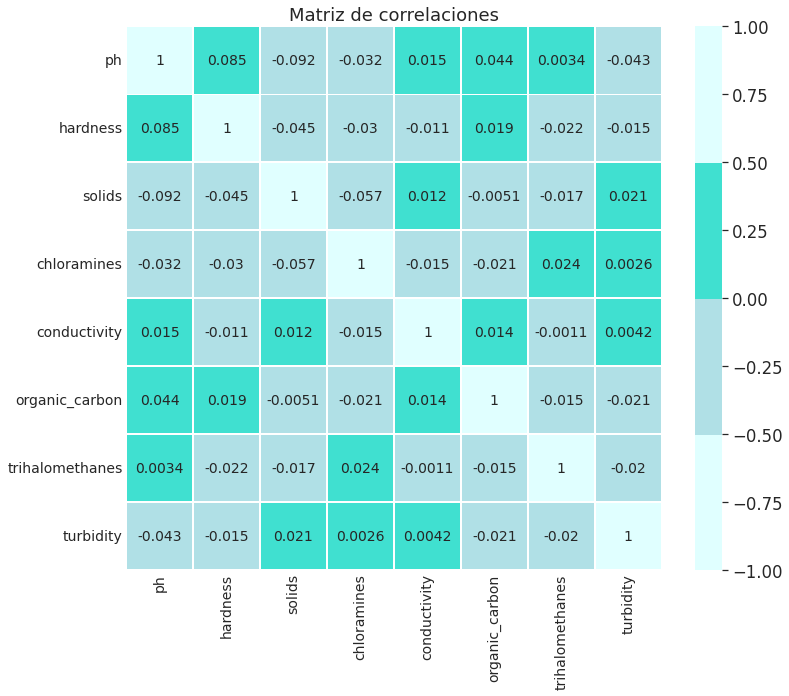

In [36]:
fig = plt.figure(figsize=(12, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df[cols[:-2]].corr(), 
                 vmin=-1, vmax=1, center = 0, 
                 annot=True, annot_kws = {'size':14},
                 cmap=["lightcyan", "powderblue", "turquoise", "lightcyan"], 
                 linewidths=.5)
ax.set_title('Matriz de correlaciones', fontsize=18)
ax.tick_params(axis='both', length=0, labelsize=14)
sns.set(font_scale=1)

Podemos ver que ninguna correlación es menor a -0.5 ni mayor a 0.5, por lo que en general, la correlación lineal entre cada par de variables es muy baja. La correlación lineal positiva más alta es de 0.085 entre `ph` y `hardness`. La correlación lineal más cercana a 0 o nula es de -0.0011 y es entre `conductivity` y `trihalomethanes`. La mejor correlación lineal negativa es de -0.092 entre `ph` y `solids`.

Ahora visualicemos las gráficas de dispersión de las variables numéricas.

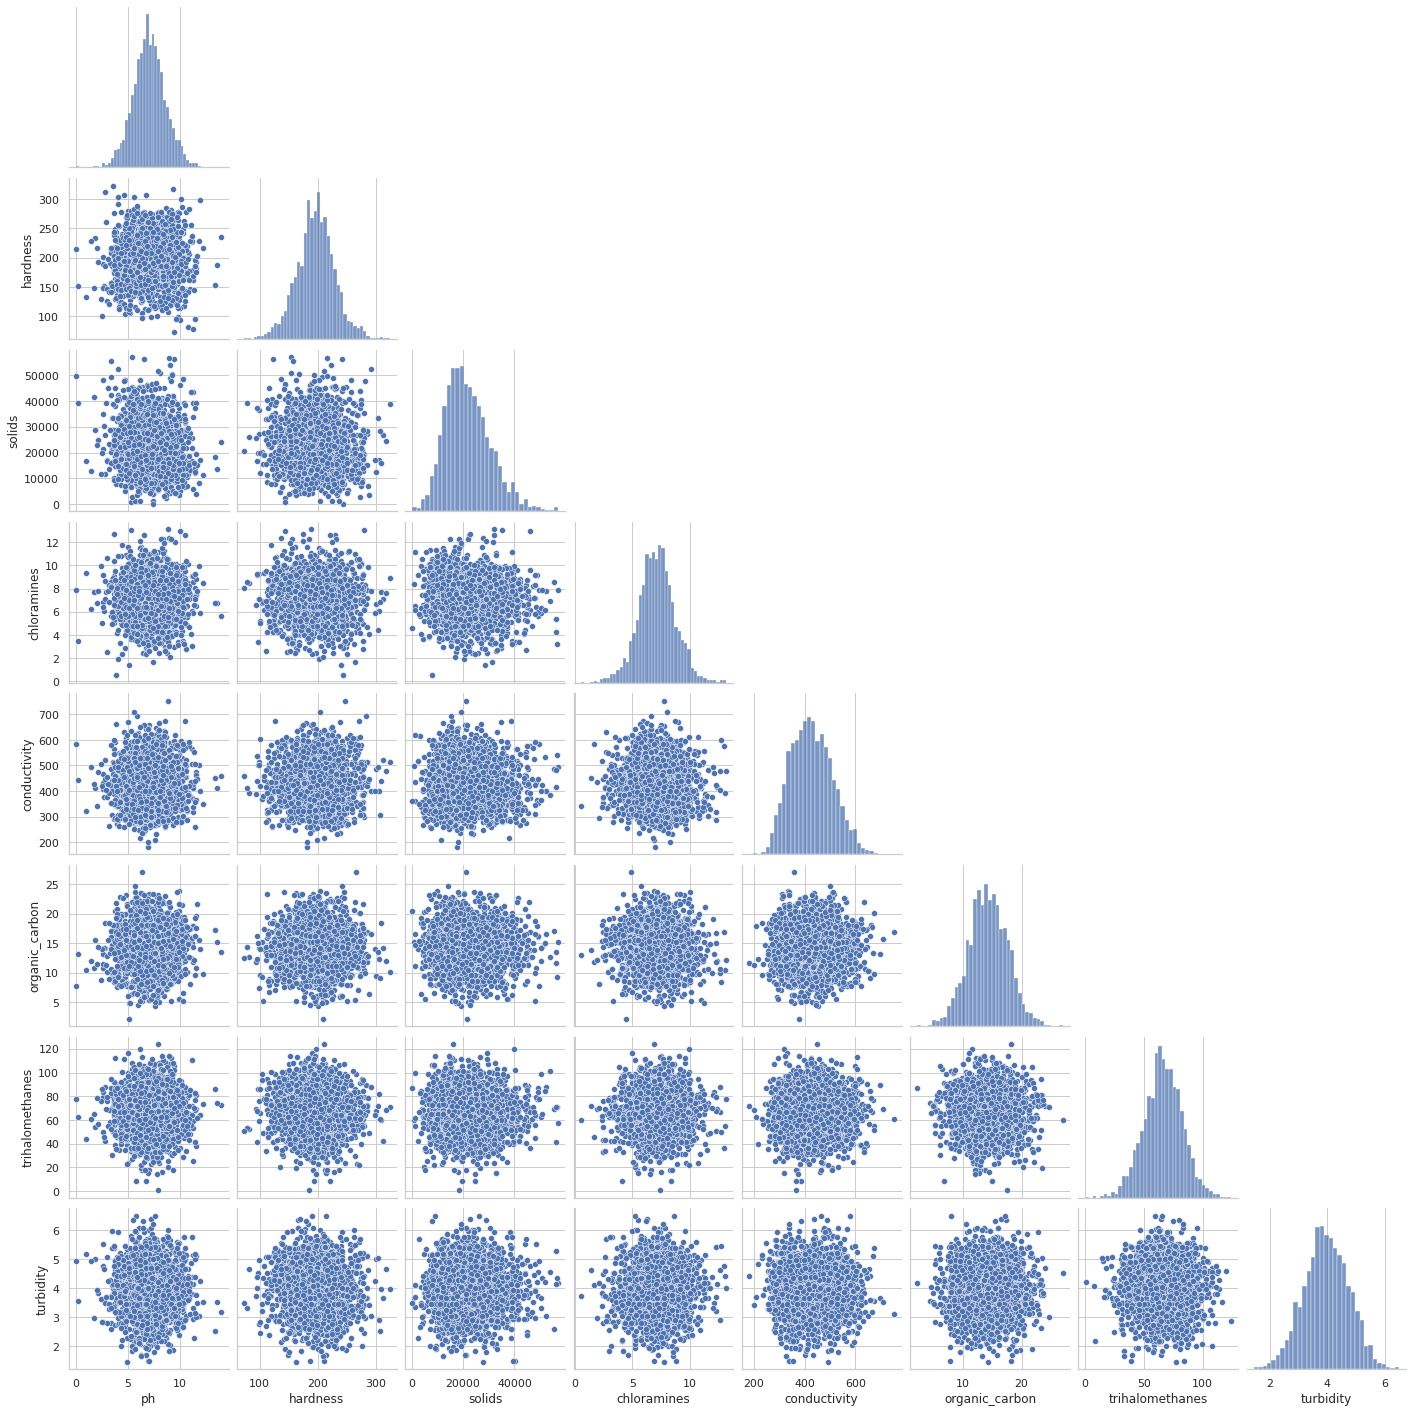

In [37]:
sns.set_style("whitegrid")
sns.pairplot(data=df[cols[:-2]], corner = True);

En ningún par de variables podemos observar gráficamente una correlación lineal y las nubes de puntos lucen bastante compactas, es decir, no tenemos indicio de que haya valores atípicos afectando el cálculo de los coeficientes de correlación de Pearson, hecho que ya habíamos intuido desde el cálculo de las medidas de locación y variabilidad en el Postwork 1 y con los boxplots del Postwork 2.

Evidentemente no tiene mucho sentido utilizar un modelo de regresión lineal, pero por practicar utilizaremos las variables *ph* y *hardness* y *ph* y *turbidity*, en ambos casos elegimos a *ph* como variable independiente.

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

serie_1 = df['ph']
serie_2 = df['hardness']

# Entrenamiento del modelo
lr.fit(serie_1.to_frame(), serie_2)

# Predicción con el modelo entrenado
y_predict = lr.predict(serie_1.to_frame())

Obtenemos la ecuación y el coeficiente de determinación de nuestro modelo entrenado:

In [39]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
r2_score = lr.score(serie_1.to_frame(), serie_2)

Graficamos nuestros datos originales y la función de los valores predichos:

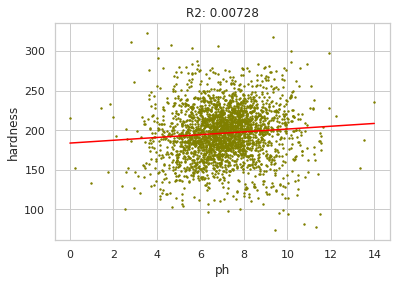

In [40]:
x_points = np.linspace(0,int(max(serie_1)),20000)
y_line_predict = coefficient*x_points + intercept

plt.plot(x_points, y_line_predict, color = 'red')
plt.scatter(serie_1, serie_2, s = 2, color = 'olive')
plt.title(f"R2: {r2_score:.5f}")
plt.xlabel("ph")
plt.ylabel("hardness");

Como era de esperarse, el coeficiente de correlación es muy bajo. Por lo que no podemos predecir la variable *hardness* con la variable *ph* con un modelo lineal pues no existe correlación lineal entre las variables.

Los resultados son similares para el caso de *ph* y *turbidity*.

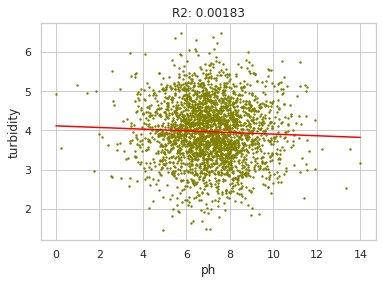

In [41]:
lr = LinearRegression()

serie_1 = df['ph']
serie_2 = df['turbidity']

lr.fit(serie_1.to_frame(), serie_2)

y_predict = lr.predict(serie_1.to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
r2_score = lr.score(serie_1.to_frame(), serie_2)

x_points = np.linspace(0,int(max(serie_1)),20000)
y_line_predict = coefficient*x_points + intercept

plt.plot(x_points, y_line_predict, color = 'red')
plt.scatter(serie_1, serie_2, s = 2, color = 'olive')
plt.title(f"R2: {r2_score:.5f}")
plt.xlabel("ph")
plt.ylabel("turbidity");

# Postwork 5

**Distribuciones muestrales y técnicas de evaluación de modelos**

- Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
- Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
  - La distribución, su asimetría y curtosis
  - El error estándar
  - El intervalo de confianza que te parezca más apropiado

- Elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

Aplicaremos la técnica de bootstrap a nuestros datos para explorar la distribución muestral de la media, haremos 100 000 remuestreos, cada uno de 5 elementos. 

In [42]:
def bootstrap(data, sample, iterations):
  means = []
  for i in range(iterations):
    samples = data.sample(n=sample, replace=True)
    means.append(samples.mean())
  serie = pd.Series(means)
  return serie

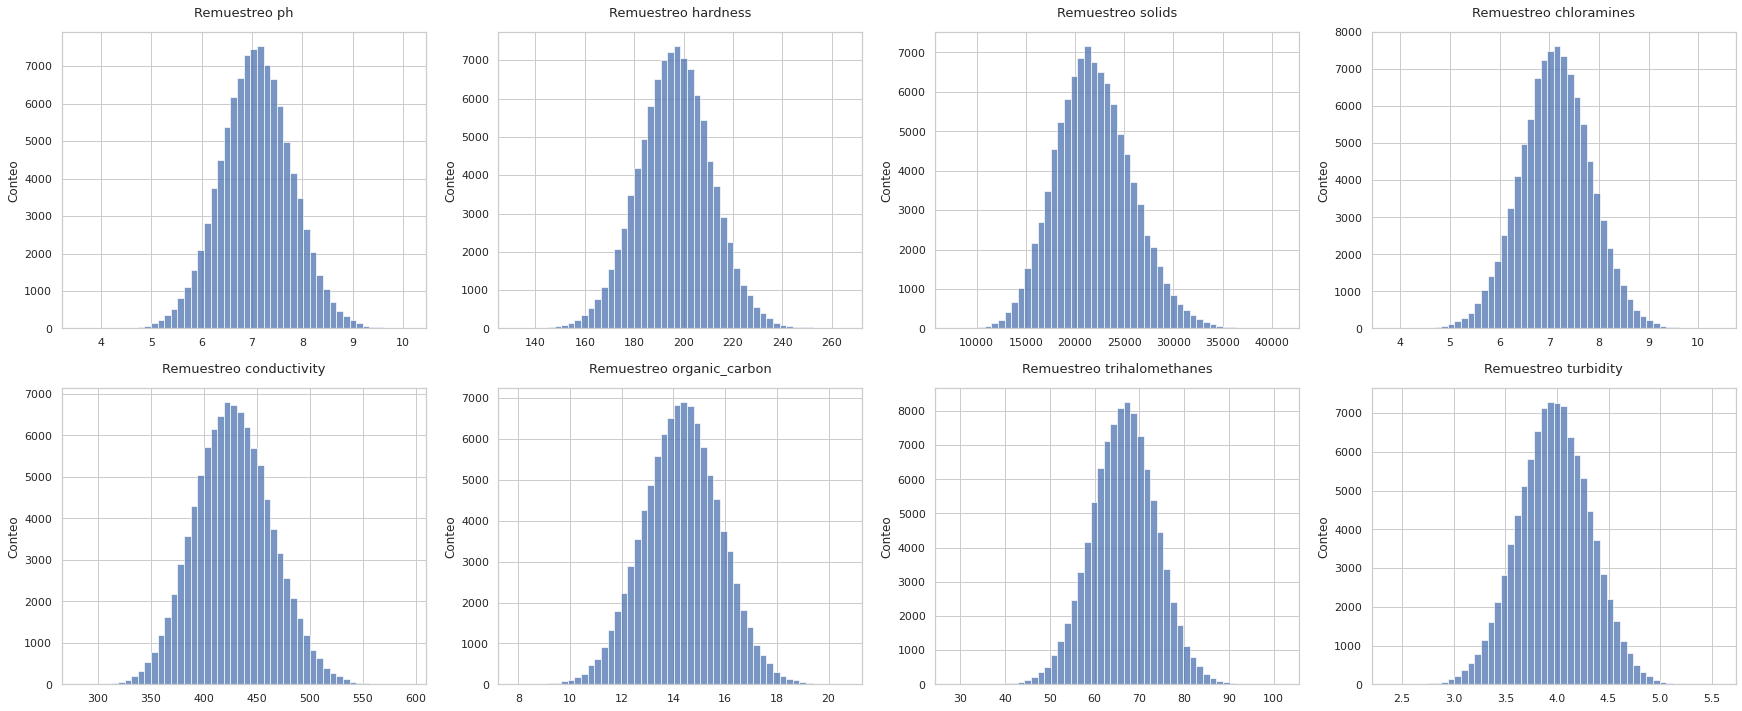

In [43]:
cols = df.columns
means = []
fig = plt.figure(figsize=(30,12))
for i in range(1,len(cols)-1):
  serie = bootstrap(df[cols[i-1]], 5, 100000)
  means.append(serie)
  plt.subplot(2, 4, i)
  ax = sns.histplot(x = serie, bins = 50)
  ax.set_title('Remuestreo ' + cols[i-1], fontsize=13, pad=15);
  ax.set_ylabel('Conteo')

Ahora calcularemos el error, asimetría, curtosis e intervalos de confianza de cada distribución.

In [44]:
def intervalo_de_confianza(series, confianza):
    alpha = round((1-confianza)/2,5)
    limite_inf = series.quantile(alpha)
    limite_sup = series.quantile(1 - alpha)
    print(f"Intervalo de {confianza * 100}% de confianza: {round(limite_inf, 5)} < {round(series.mean(), 5)} < {round(limite_sup, 5)}")

In [45]:
len(means)

8

In [46]:
for i in range(len(means)):
  print(cols[i])
  print(f"Curtosis: {round(kurtosis(means[i]),5)}")
  print(f"Asimetría: {round(skew(means[i]),5)}")
  print(f"Error estándar: {round(means[i].std(),5)}")
  intervalo_de_confianza(series = means[i], confianza=0.90)
  intervalo_de_confianza(series = means[i], confianza=0.95)
  intervalo_de_confianza(series = means[i], confianza=0.99)
  print('*'*35,'\n')

ph
Curtosis: 0.10121
Asimetría: 0.01539
Error estándar: 0.70849
Intervalo de 90.0% de confianza: 5.91966 < 7.07911 < 8.24466
Intervalo de 95.0% de confianza: 5.68522 < 7.07911 < 8.47604
Intervalo de 99.0% de confianza: 5.23995 < 7.07911 < 8.95381
*********************************** 

hardness
Curtosis: 0.13651
Asimetría: -0.00966
Error estándar: 14.76626
Intervalo de 90.0% de confianza: 172.04362 < 196.39595 < 220.48238
Intervalo de 95.0% de confianza: 167.17962 < 196.39595 < 225.51278
Intervalo de 99.0% de confianza: 157.65469 < 196.39595 < 235.05698
*********************************** 

solids
Curtosis: 0.09554
Asimetría: 0.25568
Error estándar: 3885.43842
Intervalo de 90.0% de confianza: 15822.90455 < 21921.93564 < 28569.57989
Intervalo de 95.0% de confianza: 14806.5825 < 21921.93564 < 29988.47507
Intervalo de 99.0% de confianza: 12856.53244 < 21921.93564 < 32874.00584
*********************************** 

chloramines
Curtosis: 0.13231
Asimetría: -0.00942
Error estándar: 0.71115
Int

La distribución de *ph* es simétrica y leptocúrtica. La distribución de *solids* es mesocúrtica y con una ligera simetría positiva. En el caso de *chloramines* la distribución es simétrica y leptocúrtica. *conductivity* tiene una distribución mesocúrtica con asimetría positiva. Para *hardness*, *organic_carbon*, *trihalomethanes* y *turbidity* se tiene una distribución mesocúrtica y simétrica, podríamos decir que se trata de una normal, aunque en realidad todas las variables tuvieron valores muy bajos tanto de asimetría y curtosis.

Entrenaremos un modelo de regresión lineal múltiple tomando a las variables *solids* y *organic_carbon* para predecir la variable *turbidity*.

In [47]:
from sklearn.linear_model import LinearRegression

lr_split = LinearRegression()
lr_cv = LinearRegression() # modelo para validación cruzada

In [48]:
# Separamos las variables independientes (solids y organic_carbon) y dependientes (turbidity)
X = df[['solids', 'organic_carbon']]
y = df['turbidity']

# y obtenemos los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [49]:
# Entrenamos el modelo
lr_split.fit(X_training, y_training)

# Evaluamos el modelo
lr_split.score(X_test, y_test)

-0.0032519691031867026

In [50]:
# Aplicamos validación cruzada
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_cv, X, y, scoring='r2')
scores

{'fit_time': array([0.00509238, 0.00222993, 0.00208235, 0.00204468, 0.00215006]),
 'score_time': array([0.00169587, 0.00154376, 0.00150657, 0.00150084, 0.00151157]),
 'test_score': array([ 0.00113758, -0.0064765 , -0.00335617, -0.02264513,  0.00151951])}

In [51]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -0.006 +/- 0.009


Por el bajo valor del score obtenido podemos decir que un modelo de regresión lineal múltiple no es bueno para predecir la variable *turbidity* en función de *solids* y *organic_carbon*.

# Postwork 6

**Visualización de datos avanzada**

Revisa con detenimiento si hay alguna buena razón para utilizar en tu proyecto alguna de las gráficas que aprendimos hoy.

- Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
- Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
- Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
- Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
- Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.

Visualizaremos los scatterplots por categoría.

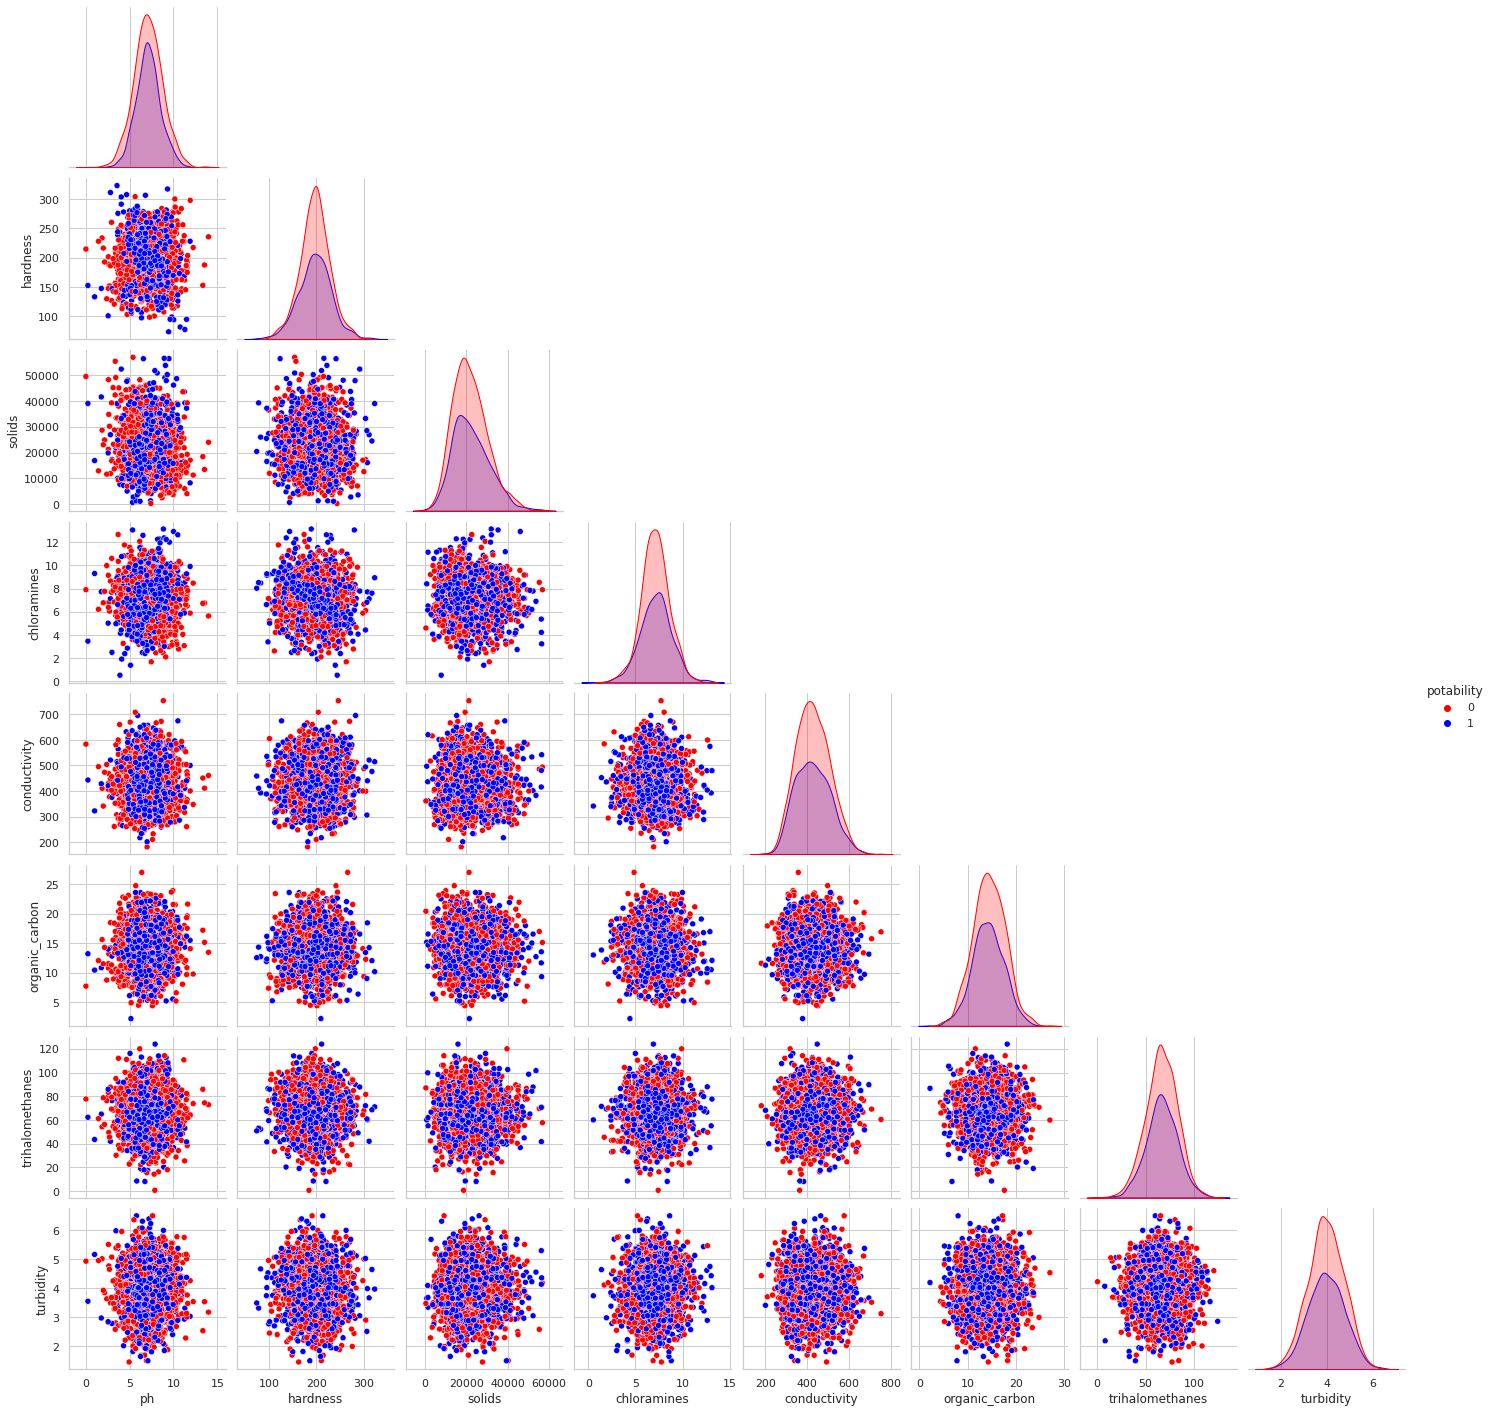

In [52]:
sns.pairplot(data=df[['ph', 'hardness', 'solids', 'chloramines', 'conductivity','organic_carbon', 'trihalomethanes', 'turbidity', 'potability']], 
             hue='potability', palette=['red', 'blue'], corner=True);
            #no consideramos la variable categórica acid

Las nubes de puntos se encuentran bien mezcladas respecto a las 2 categorías, la forma de las densidades es similar, que la curva azul que corresponde a las muestras de agua potable sea más pequeña se debe a que tenemos menos muestras.

Generando el mismo gráfico ahora con la variable categórica *acid*.

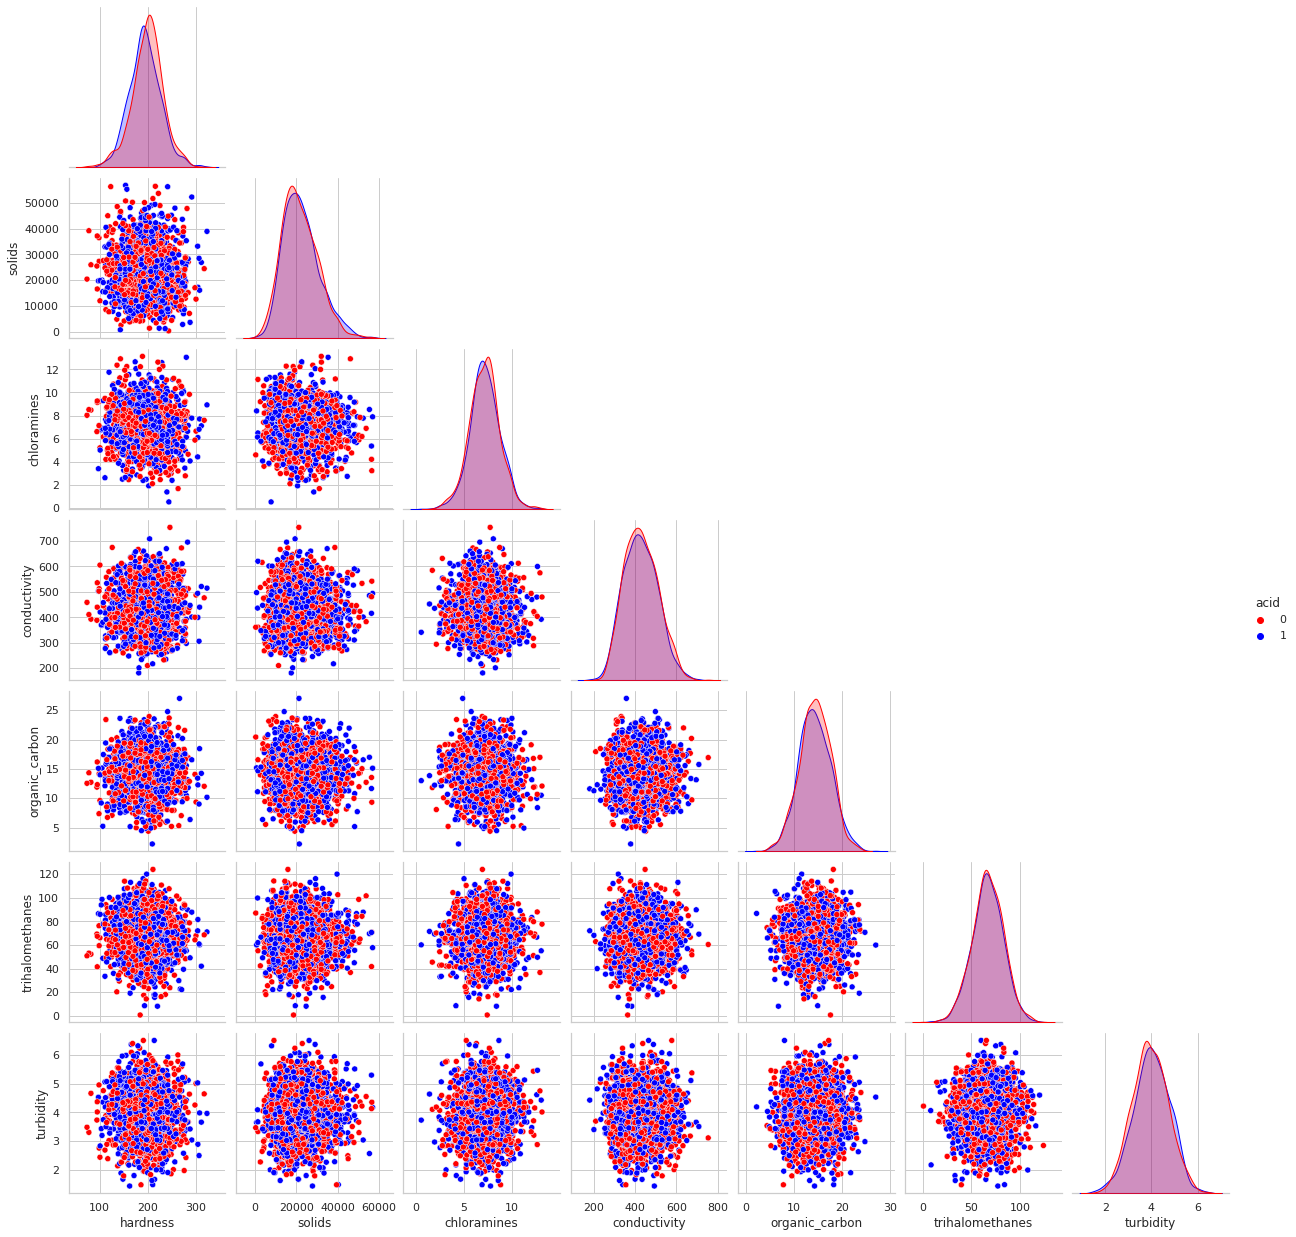

In [53]:
sns.pairplot(data=df[['hardness', 'solids', 'chloramines', 'conductivity','organic_carbon', 'trihalomethanes', 'turbidity', 'acid']], 
             hue='acid', palette=['red', 'blue'], corner=True);
            #no consideramos la variable categórica potability ni la variable numérica ph pues con esa se obtuvo la variable acid

No hay separación en las nubes de puntos.

Ahora exploraremos la relación entre cada par de variables numéricas con gráficas de densidad bivariadas.

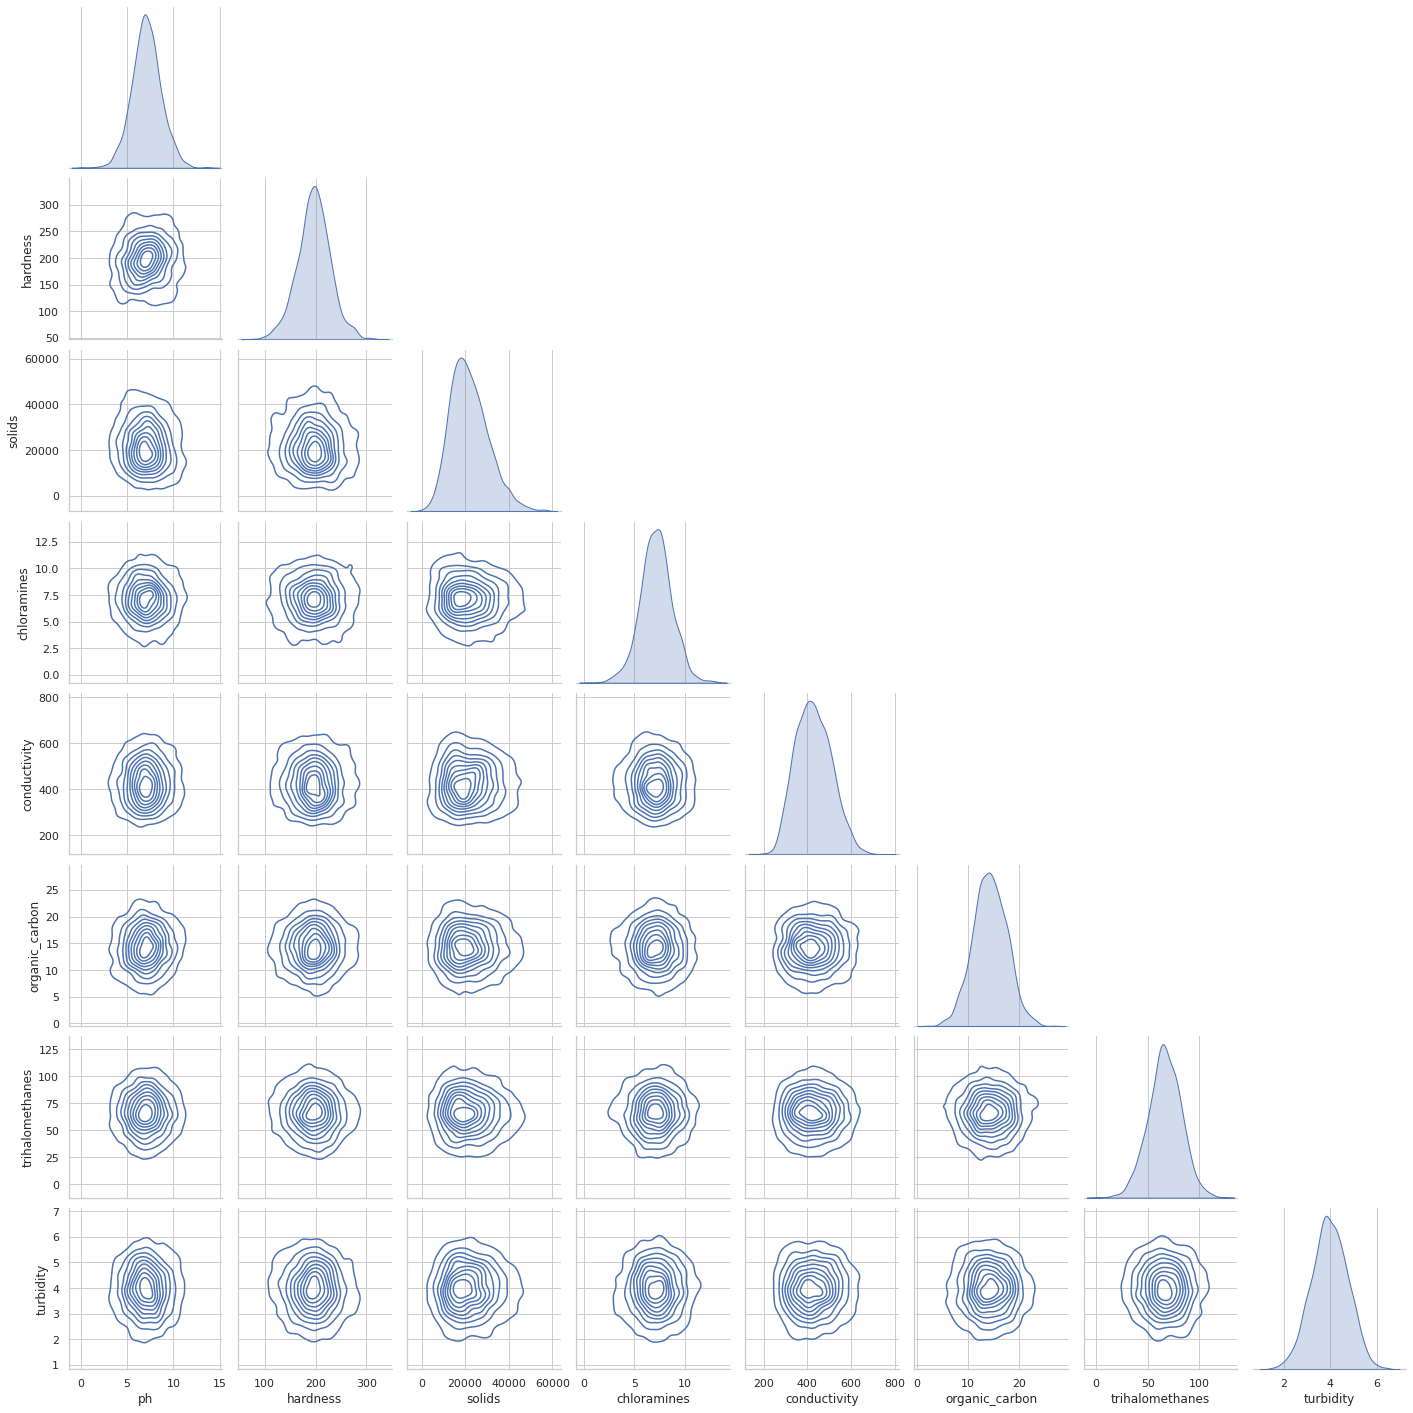

In [54]:
sns.pairplot(df[['ph', 'hardness', 'solids', 'chloramines', 'conductivity','organic_carbon', 'trihalomethanes', 'turbidity']], 
             corner=True, kind="kde");

# Postwork 8

**Introducción a Machine Learning: Clasificación No Supervisada y Supervisada**

*REQUISITO:* Tener un dataset limpio que contenga una variable dependiente binaria. En caso de que tu dataset no contenga una variable dependiente binaria, date una vuelta por Kaggle y busca algún dataset apropiado.

Realiza los siguientes pasos:
- Entrena un modelo de Regresión Logística con tu dataset.
- Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC/AUC.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
# Utilizaremos todas las variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [57]:
# Particionamos los datos en 70% para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Creamos el modelo
logreg = LogisticRegression()

# Ajustamos el modelo de regresión
logreg.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
y_pred = logreg.predict(X_test)


Obtenemos la exactitud del modelo:

In [60]:
logreg.score(X_test, y_test)

0.9949685534591195

Procedemos a evaluar el modelo creado:

In [61]:
from sklearn import metrics

Matriz de confusión

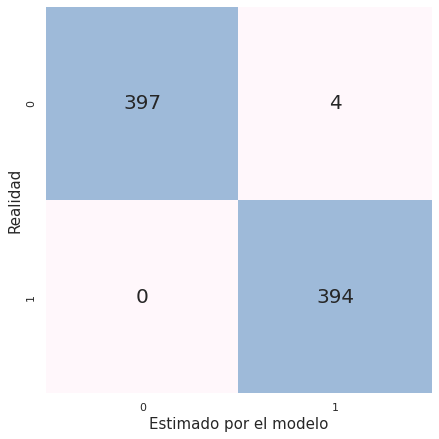

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creamos un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="PuBu",
            center=500, fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Es extraño que el modelo predice muy pocos positivos, además de que una gran parte de las predicciones son falsos negativos.
Utilizaremos menos variables independientes para ver si mejora la predicción.

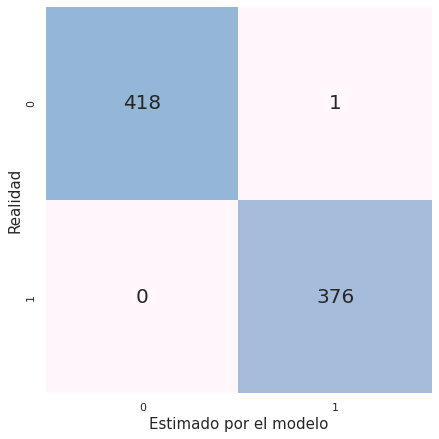

In [63]:
X = df[['ph', 'hardness', 'solids', 'chloramines', 'organic_carbon', 'turbidity']]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenamos el modelo de regresión logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Creamos la matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="PuBu",
            center=500,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

El resultado es similar, aunque hubo un aumento en la predicción de muestras positivas. Sin embargo, sabemos que tendremos un valor de precisión muy bajo.

In [64]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=False))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9973474801061007
Exactitud: 0.9987421383647799
Sensibilidad: 1.0
Especificidad: 0.9976133651551312


La precisión es 45.4% debido a que los verdaderos positivos clasificados solo fueron 10, por la misma razón, la sensibilidad es muy baja (3%). Y como la mayoría de los verdaderos negativos se clasificaron de forma acertada, tenemos una especificidad de 97%. Con respecto a la exactitud, podemos decir que el 59% de las clasificaciones realizadas, se hicieron correctamente.

Ahora veamos el comportamiento de la curva ROC.

In [65]:
from sklearn.metrics import roc_curve, auc

#obtenemos los resultados probabilísticos del modelo
y_pred_proba = logreg.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

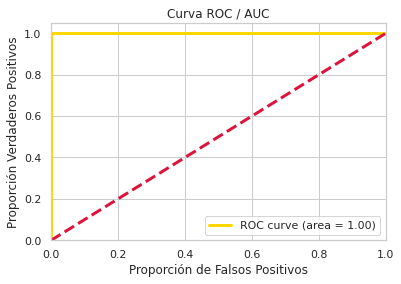

In [66]:
plt.figure()
plt.plot(fpr, tpr, color='gold',
         label='ROC curve (area = %0.2f)' % roc_auc,linewidth=3)
plt.plot([0, 1], [0, 1], color='crimson', linestyle='--',linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción de Falsos Positivos')
plt.ylabel('Proporción Verdaderos Positivos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

El valor es prácticamente igual a 0.5, lo cual significa que el modelo no puede diferenciar entre positivos y negativos, es decir, si el cuerpo de agua es potable o no. Esto puede atribuirse a varias causas como, la elección de las variables independientes, o a que la información o registros no son suficientes. Por lo tanto, podemos decir que el modelo de regresión logística no es el más apropiado para este problema.